<a href="https://colab.research.google.com/github/changsin/dart/blob/main/src/notebooks/spline_annotation_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spline annotation sample


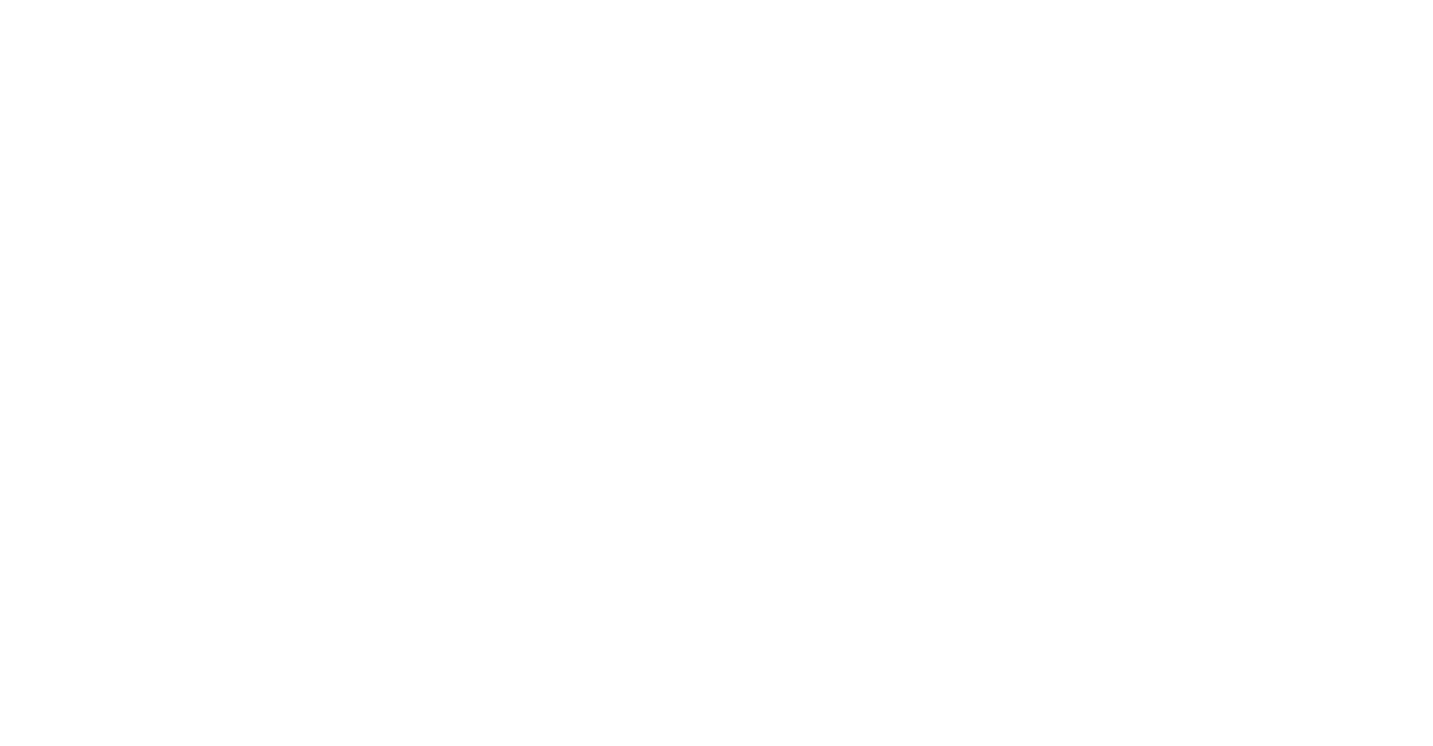

In [35]:
import numpy as np
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from scipy import interpolate

%matplotlib inline

label_filename = "/content/forddat2_20191114_kpq6948_rwup_moart_sar_sar_mj_ks_142240_078.mkv_000600.xml"
image_filename = "/content/forddat2_20191114_kpq6948_rwup_moart_sar_sar_mj_ks_142240_078.mkv_000600.jpg"

# def draw_spline(spline):
#     points = []
#     for point in spline.findall('Point'):
#         points.append((float(point.get('x')), float(point.get('y'))))
#     spline = BSpline(np.arange(len(points)), points, 3)
#     curve = np.array([spline(x) for x in np.linspace(0, len(points)-1, 50)])
#     plt.plot(curve[:, 0], curve[:, 1], 'b')
#     plt.plot(points[0][0], points[0][1], 'ro')
#     plt.plot(points[-1][0], points[-1][1], 'ro')
#     plt.show()


## Expect x to be a 1D strictly increasing sequence.
# def draw_spline(spline_data):
#     control_points = []
#     radii = []
    
#     for point in spline_data.iter('Point'):
#         x = float(point.attrib['x'])
#         y = float(point.attrib['y'])
#         r = float(point.attrib['r'])
#         control_points.append((x, y))
#         radii.append(r)

#     spline = make_interp_spline(*zip(*control_points))
#     num_points = max(int(spline_data.attrib['pointNum']) * 10, 200)
#     t = np.linspace(0, 1, num_points)
#     spline_points = np.vstack(spline(t)).T

#     # Draw the spline
#     for i in range(len(spline_points) - 1):
#         p1 = spline_points[i]
#         p2 = spline_points[i+1]
#         r1 = radii[i]
#         r2 = radii[i+1]
#         v = p2 - p1
#         n = np.array([-v[1], v[0]]) / np.linalg.norm(v)
#         m1 = p1 + r1 * n
#         m2 = p2 + r2 * n
#         if i == 0:
#             draw.ellipse([m1[0]-r1, m1[1]-r1, m1[0]+r1, m1[1]+r1], fill=(255, 0, 0))
#         draw.line((m1[0], m1[1], m2[0], m2[1]), fill=(255, 0, 0), width=max(int(r1), 1), joint='curve')
#         draw.ellipse([m2[0]-r2, m2[1]-r2, m2[0]+r2, m2[1]+r2], fill=(255, 0, 0))


# def draw_spline(spline):
#   points = spline.findall('.//Point')
#   x = []
#   y = []
#   r = []
#   for point in points:
#     x.append(float(point.get('x')))
#     y.append(float(point.get('y')))
#     r.append(float(point.get('r')))
  
#   # sort points by x coordinate
#   sorted_indices = sorted(range(len(x)), key=lambda i: x[i])
#   x = [x[i] for i in sorted_indices]
#   y = [y[i] for i in sorted_indices]
#   r = [r[i] for i in sorted_indices]

#   # fit the spline
#   tck, u = interpolate.splprep([x, y], s=0)
#   unew = np.linspace(0, 1.0, 1000)
#   xnew, ynew = interpolate.splev(unew, tck)

#   # plot the spline
#   plt.plot(xnew, ynew, color='blue')
#   s = [point.get('r')*10 for point in points]
#   plt.scatter(x, y, s=s, color='red')
#   plt.axis('equal')
#   plt.show()


# def draw_spline(spline):
#     points = spline.findall('.//Point')
#     x = []
#     y = []
#     for point in points:
#         x.append(float(point.get('x')))
#         y.append(float(point.get('y')))

#     # interpolate the spline
#     tck, u = interpolate.splprep([x, y], s=0)
#     u_new = np.linspace(u.min(), u.max(), 100)
#     x_new, y_new = interpolate.splev(u_new, tck)

#     # plot the spline
#     plt.plot(x_new, y_new, color='blue')
#     s = [point.get('r')*10 for point in points]
#     n = len(x)
#     s = s[:n]
#     plt.scatter(x, y, s=s, color='red')
#     plt.axis('equal')
#     plt.show()


# def draw_spline(spline):
#   points = spline.findall('.//Point')
#   x = [float(point.get('x')) for point in points]
#   y = [float(point.get('y')) for point in points]
#   tck, u = interpolate.splprep([x, y], s=0, k=2)
#   unew = np.linspace(0, 1, 1000)
#   out = interpolate.splev(unew, tck)
#   xnew, ynew = out[0], out[1]
#   r = [float(point.get('r')) for point in points]
#   # s = [r[min(int(uu*len(r)), len(r)-1)] for uu in unew]
#   s = []
#   for uu in unew:
#     index = int(uu*len(r))
#     if index == len(r):
#       index = len(r) - 1
#     s.append(r[index])

#   # s = [r[int(uu*len(r))] for uu in unew]
#   plt.plot(xnew, ynew, color='blue')
#   plt.scatter(x, y, s=s, color='red')
#   plt.axis('equal')
#   plt.show()

# # This works!
# def draw_spline(spline):
#   points = spline.findall('.//Point')
#   x = [float(point.get('x')) for point in points]
#   y = [float(point.get('y')) for point in points]
#   tck, u = interpolate.splprep([x, y], s=0, k=2)
#   unew = np.linspace(0, 1, 1000)
#   out = interpolate.splev(unew, tck)
#   xnew, ynew = out[0], out[1]
#   r = [float(point.get('r')) for point in points]

#   s = []
#   for point in points:
#       r_value = float(point.get('r'))
#       s.append((r_value - min(r))/(max(r) - min(r)) * 100 + 10)

#   s = np.array(s)
#   s = (s - np.min(s)) / (np.max(s) - np.min(s)) * 100 + 10
#   plt.plot(xnew, ynew, color='blue')

#   print("x size {}, y size {} s size {}".format(len(x), len(y), len(s)))
#   plt.scatter(x, y, s=s, color='red')
#   plt.axis('equal')
#   plt.show()

# def draw_spline_on_image(image_file, spline):
#     # Load the image
#     img = image.imread(image_file)

#     # Extract the spline coordinates and radii
#     points = spline.findall('.//Point')
#     x = [float(point.get('x')) for point in points]
#     y = [float(point.get('y')) for point in points]
#     r = [float(point.get('r')) for point in points]

#     # Calculate the spline
#     tck, u = interpolate.splprep([x, y], s=0, k=2)
#     unew = np.linspace(0, 1, 1000)
#     out = interpolate.splev(unew, tck)
#     xnew, ynew = out[0], out[1]

#     # Calculate the radii for each point on the spline
#     s = [(r_value - min(r))/(max(r) - min(r)) * 100 + 10 for r_value in r]
#     s = np.array(s)

#     # Display the image and plot the spline on top of it
#     plt.imshow(img)
#     plt.plot(xnew, ynew, color='red', linewidth=3)
#     plt.scatter(x, y, s=s, color='blue')
#     plt.axis('off')
#     plt.show()
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from PIL import Image

def draw_spline(spline):
  points = spline.findall('.//Point')
  x = [float(point.get('x')) for point in points]
  y = [float(point.get('y')) for point in points]
  tck, u = interpolate.splprep([x, y], s=0, k=2)
  unew = np.linspace(0, 1, 1000)
  out = interpolate.splev(unew, tck)
  xnew, ynew = out[0], out[1]
  r = [float(point.get('r')) for point in points]

  s = []
  for point in points:
      r_value = float(point.get('r'))
      s.append((r_value - min(r))/(max(r) - min(r)) * 100 + 10)

  s = np.array(s)
  s = (s - np.min(s)) / (np.max(s) - np.min(s)) * 100 + 10
  plt.plot(xnew, ynew, color='blue')
  plt.scatter(x, y, s=s, color='red')


# # Load the image
# img = Image.open(image_filename)

# # Create a new figure with the image
# fig, ax = plt.subplots(figsize=(10,10))
# ax.imshow(img)

# # Plot multiple splines
# for spline in splines:
#   draw_spline(spline)

# # Show the image with all splines
# plt.axis('off')
# plt.hold(True)
# plt.show()



def draw_spline_on_image(image_path, splines):
    # Load the image
    img = Image.open(image_path)

    # Create a new figure and set its size to match the image
    fig, ax = plt.subplots(figsize=(img.size[0] / 100, img.size[1] / 100))
    ax.imshow(img)

    # Plot each spline and its scatter points on the same Axes instance
    for spline in splines:
        points = spline.findall('.//Point')
        x = [float(point.get('x')) for point in points]
        y = [float(point.get('y')) for point in points]
        tck, u = interpolate.splprep([x, y], s=0, k=2)
        unew = np.linspace(0, 1, 1000)
        out = interpolate.splev(unew, tck)
        xnew, ynew = out[0], out[1]
        r = [float(point.get('r')) for point in points]

        s = []
        for point in points:
            r_value = float(point.get('r'))
            s.append((r_value - min(r)) / (max(r) - min(r)) * 100 + 10)

        s = np.array(s)
        s = (s - np.min(s)) / (np.max(s) - np.min(s)) * 100 + 10

        ax.plot(xnew, ynew, color='blue')
        ax.scatter(x, y, s=s, color='red')

    plt.axis('off')
    plt.show()


# Read in the XML data
tree = ET.parse(label_filename)
root = tree.getroot()

# Extract the spline points
splines = root.findall('.//Spline')
# for spline in splines:
#   draw_spline(image_filename, spline)

draw_spline_on_image(image_filename, splines)

# for spline in splines:
#   print(spline)
#   x = [float(pt.get('x')) for pt in spline.findall('.//Point')]
#   y = [float(pt.get('y')) for pt in spline.findall('.//Point')]

#   # Interpolate the spline
#   tck, u = make_interp_spline(range(len(x)), list(zip(x, y)))._get_spline()
#   x_new, y_new = BSpline(tck[0], tck[1], tck[2], extrapolate=False)(np.linspace(0, 1, 1000)).T

#   # Plot the spline
#   fig, ax = plt.subplots()
#   ax.plot(x_new, y_new, '-b', label='Spline')
#   ax.scatter(x, y, c='red', label='Control points')
#   ax.legend()
#   plt.show()


(-0.5, 1823.5, 943.5, -0.5)

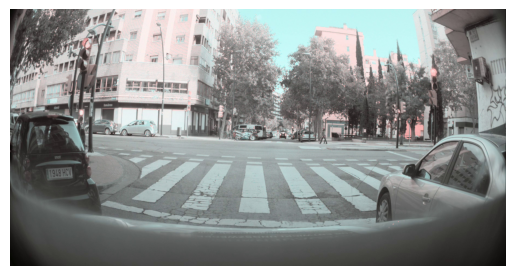

In [48]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy import interpolate
import xml.etree.ElementTree as ET

label_filename = "/content/forddat2_20191114_kpq6948_rwup_moart_sar_sar_mj_ks_142240_078.mkv_000600.xml"
image_filename = "/content/forddat2_20191114_kpq6948_rwup_moart_sar_sar_mj_ks_142240_078.mkv_000600.jpg"

def draw_spline(spline, ax):
    points = spline.findall('.//Point')
    x = [float(point.get('x')) for point in points]
    y = [float(point.get('y')) for point in points]
    tck, u = interpolate.splprep([x, y], s=0, k=2)
    unew = np.linspace(0, 1, 1000)
    out = interpolate.splev(unew, tck)
    xnew, ynew = out[0], out[1]
    r = [float(point.get('r')) for point in points]

    s = []
    for point in points:
        r_value = float(point.get('r'))
        s.append((r_value - min(r))/(max(r) - min(r)) * 100 + 10)

    s = np.array(s)
    s = (s - np.min(s)) / (np.max(s) - np.min(s)) * 100 + 10
    ax.plt.plot(xnew, ynew, color='blue')

    print("x size {}, y size {} s size {}".format(len(x), len(y), len(s)))
    ax.scatter(x, y, s=s, color='red')
    plt.axis('equal')
    plt.show()

    # # ax.scatter(x, y, s=s, color='red')
    # # ax.plot(xnew, ynew, color='blue')

# Load the image
image = Image.open(image_filename)
plt.imshow(image)

# Load the XML file and extract the splines
tree = ET.parse(label_filename)
splines = tree.findall('.//Spline')

# Iterate through each spline and plot it on the image
ax = plt.gca()
ax.set_prop_cycle(None)
for spline in splines:
    draw_spline(spline, ax)

# Show the image with the splines
plt.axis('off')
# plt.show()


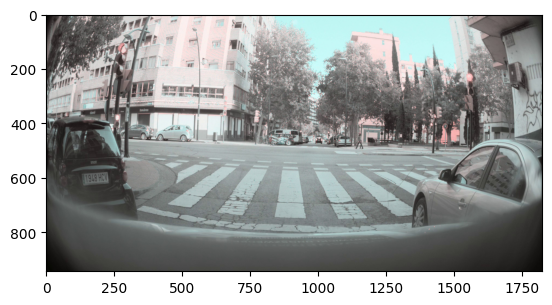

In [59]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread(image_filename)
plt.imshow(img)
plt.show()

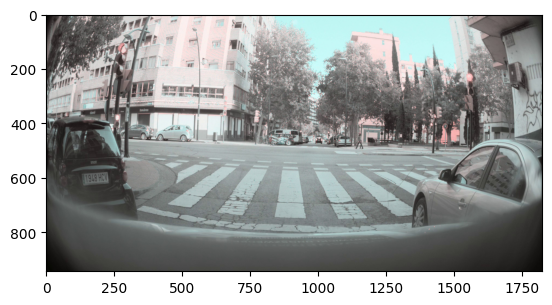

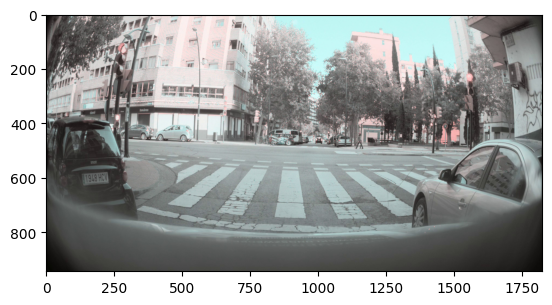

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import interpolate


def draw_spline_on_image(spline, img_file):
    # Load image
    img = Image.open(img_file)

    # Get image dimensions
    img_width, img_height = img.size

    # Draw image
    plt.imshow(img)

    # Draw splines
    for s in spline:
        points = s.findall('.//Point')
        x = [float(point.get('x')) for point in points]
        y = [float(point.get('y')) for point in points]
        tck, u = interpolate.splprep([x, y], s=0, k=2)
        unew = np.linspace(0, 1, 1000)
        out = interpolate.splev(unew, tck)
        xnew, ynew = out[0], out[1]
        r = [float(point.get('r')) for point in points]
        s_values = ((r - min(r)) / (max(r) - min(r))) * 100 + 10

        plt.plot(xnew * img_width, ynew * img_height, color='blue')
        plt.scatter(x * img_width, y * img_height, s=s_values, color='red')

    # Display plot
    plt.axis('off')
    plt.show()


tree = ET.parse(label_filename)
splines = tree.findall('.//Spline')
draw_splines_on_image(image_filename, splines)
plt.imshow(image)


/content/forddat2_20191114_kpq6948_rwup_moart_sar_sar_mj_ks_142240_078.mkv_000600.jpg


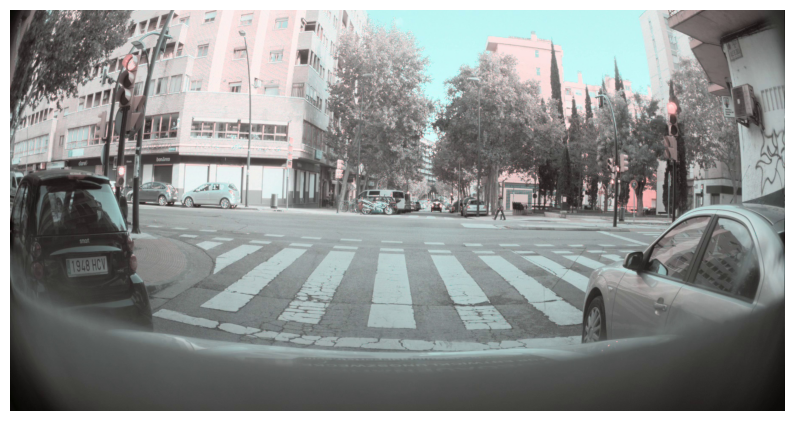

In [64]:
import matplotlib.pyplot as plt
from PIL import Image
from scipy import interpolate
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.patches as patches


print(image_filename)
image = Image.open(image_filename)

def draw_splines_on_image(image, splines):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(image)

    for spline in splines:
        points = spline.findall('.//Point')
        x = [float(point.get('x')) for point in points]
        y = [float(point.get('y')) for point in points]
        tck, u = interpolate.splprep([x, y], s=0, k=2)
        unew = np.linspace(0, 1, 1000)
        out = interpolate.splev(unew, tck)
        xnew, ynew = out[0], out[1]

        # patch = patches.Polygon(np.array([xnew, ynew]).T, facecolor=None, edgecolor='red', linewidth=2)
        patch = patches.Polygon(np.array([xnew, ynew]).T, facecolor=None, edgecolor='red', linewidth=12, alpha=1.0)
        ax.add_patch(patch)

    ax.set_axis_off()
    plt.show()

draw_splines_on_image(image, splines)

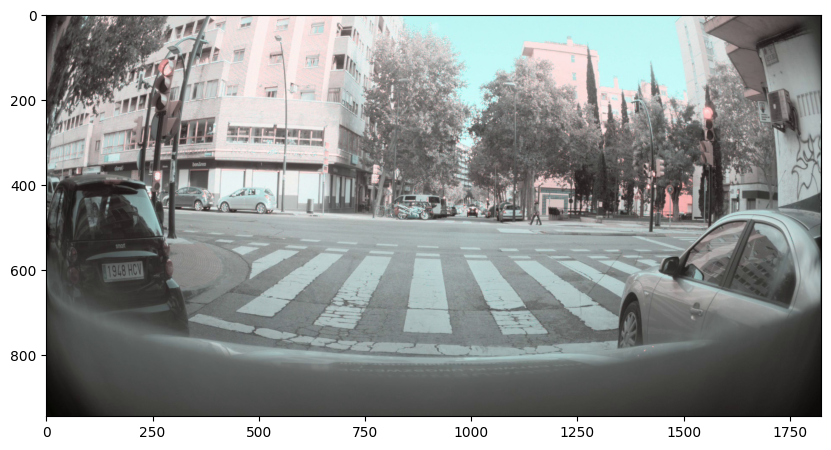

In [61]:
image = Image.open(image_filename)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)